# Reseni projektu TimeDeposit_10K

## Nahrani a prehled o datech
Zakladni knihovny a prvni pohled na data, import pomoci pandas, kontrola poctu zaznamu, formatu, NaN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

raw = pd.read_csv('TimeDeposit_10K.csv', sep = ';')
raw.head()

,Customer_ID,Gender,Birth_Date,Ref_Date,Marital_Status,Children_Num,Occupation_Category,Total_Income,Payroll_Flag,Business_Flag,...,Transfer_Trans_Amount,Credit_Cards_Installments,Credit_Cards_Payments_Num,Credit_Cards_Purchases_Num,Credit_Cards_Witrhdrawals_Num,Credit_Cards_Payments_Amount,Credit_Cards_Purchases_Amount,Credit_Cards_Witrhdrawals_Amount,Arrears_Months_Max,Time_Deposits_Flag
0,5904453.0,Male,1960-10-17,2008-12-31,Married,2.0,Rentiers,14000.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,1.0,F
1,5904524.0,Male,1972-02-22,2008-12-31,Divorced,0.0,Employees,17577.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,1.0,F
2,5904672.0,Male,1953-06-24,2008-12-31,Married,1.0,Rentiers,3000.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,F
3,125603.0,Male,1952-09-19,2008-12-31,Married,0.0,Rentiers,14735.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,F
4,1065914.0,Male,1960-08-04,2008-12-31,Single,0.0,Business-Owners,99755.0,0.0,1.0,...,0.0,8.666667,3.5,2.0,0.0,275.833333,78.22,0.0,2.0,F


In [2]:
len(raw)

10000

In [3]:
raw.isna().sum()

Customer_ID                         0
Gender                              0
Birth_Date                          0
Ref_Date                            0
Marital_Status                      0
Children_Num                        0
Occupation_Category                 0
Total_Income                        0
Payroll_Flag                        0
Business_Flag                       0
Saving_Current_Accounts_Flag        0
Investment_Products_Flag            0
Insurance_Products_Flag             0
Business_Loans_Flag                 0
Housing_Loans_Flag                  0
Consumer_Loans_Flag                 0
Credit_Cards_Flag                   0
Saving_Current_Balance              0
Investment_Products_Balance         0
Insurance_Balances                  0
Business_Loans_Balance              0
Housing_Loans_Balance               0
Consumer_Loans_Balance              0
Credit_Cards_Balance                0
Branch_Trans_Num                    0
ATM_Trans_Num                       0
APS_Trans_Nu

In [4]:
(raw == 0).astype(int).sum()

Customer_ID                            0
Gender                                 0
Birth_Date                             0
Ref_Date                               0
Marital_Status                         0
Children_Num                        5909
Occupation_Category                    0
Total_Income                         506
Payroll_Flag                        7479
Business_Flag                       9211
Saving_Current_Accounts_Flag        1348
Investment_Products_Flag            9385
Insurance_Products_Flag             8431
Business_Loans_Flag                 9420
Housing_Loans_Flag                  9409
Consumer_Loans_Flag                 5491
Credit_Cards_Flag                   2645
Saving_Current_Balance              2083
Investment_Products_Balance         9390
Insurance_Balances                  8441
Business_Loans_Balance              9424
Housing_Loans_Balance               9415
Consumer_Loans_Balance              5827
Credit_Cards_Balance                5303
Branch_Trans_Num

In [5]:
raw.dtypes

Customer_ID                         float64
Gender                               object
Birth_Date                           object
Ref_Date                             object
Marital_Status                       object
Children_Num                        float64
Occupation_Category                  object
Total_Income                        float64
Payroll_Flag                        float64
Business_Flag                       float64
Saving_Current_Accounts_Flag        float64
Investment_Products_Flag            float64
Insurance_Products_Flag             float64
Business_Loans_Flag                 float64
Housing_Loans_Flag                  float64
Consumer_Loans_Flag                 float64
Credit_Cards_Flag                   float64
Saving_Current_Balance              float64
Investment_Products_Balance         float64
Insurance_Balances                  float64
Business_Loans_Balance              float64
Housing_Loans_Balance               float64
Consumer_Loans_Balance          

### Manipulace s daty
pruzkum rozlozeni hodnot a formatu jednotlivych sloupcu a uvaha o tom, ktere potrebujeme a ktere ne 

In [6]:
# no NaNs, tons of numeric data, let's see column by column
raw.drop('Customer_ID', axis = 1, inplace = True)


In [7]:
#how many genders do we actually have (that's a joke)
raw['Gender'].unique

<bound method Series.unique of 0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
9995      Male
9996    Female
9997    Female
9998    Female
9999      Male
Name: Gender, Length: 10000, dtype: object>

Mapovani kategoricke promenne pohlavi na numericke hodnoty (binarni promenna)

In [8]:
raw['Gender'] = raw['Gender'].map({'Male': 0, 'Female': 1})
raw['Gender'].values

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

Vypocet data s ohledem na referencni datum uvedene v popisu dat, tvorba sloupce Age a smazani puvodnich sloupcu

In [9]:
#ref_date should be used as the current date when calculating age, let's make it easy
raw['Birth_Date'] = pd.to_datetime(raw['Birth_Date'])
raw['Ref_Date'] = pd.to_datetime(raw['Ref_Date'])
print(raw['Birth_Date'].dtype, raw['Ref_Date'].dtype)

datetime64[ns] datetime64[ns]


In [10]:
#dates to datetime, get day difference, calculate years by common rule and round down
raw['Age'] = (np.floor((pd.to_datetime(raw['Ref_Date']) - 
             pd.to_datetime(raw['Birth_Date'])).dt.days / 365.25)).astype(np.float64)

In [11]:
raw['Age'].value_counts()
#cool, we have some numbers

42.0    325
36.0    324
41.0    311
40.0    308
31.0    305
39.0    299
48.0    294
29.0    293
28.0    290
43.0    287
37.0    282
30.0    279
34.0    279
38.0    278
32.0    275
35.0    272
33.0    271
45.0    268
46.0    265
49.0    257
44.0    252
47.0    232
50.0    231
51.0    226
27.0    223
26.0    215
53.0    207
52.0    205
55.0    182
54.0    170
25.0    167
62.0    157
57.0    154
56.0    154
61.0    140
59.0    139
58.0    136
60.0    126
63.0    125
24.0    110
64.0    102
23.0     99
69.0     80
65.0     75
66.0     73
67.0     68
22.0     62
68.0     52
21.0     38
20.0     24
19.0     14
Name: Age, dtype: int64

Ze zvedavosti histogram vekovych kategorii, jen pro predstavu jak reprezentativni vzorek je

(array([ 237., 1005., 1423., 1435., 1530., 1311., 1126.,  796.,  687.,
         450.]),
 array([19., 24., 29., 34., 39., 44., 49., 54., 59., 64., 69.]),
 <BarContainer object of 10 artists>)

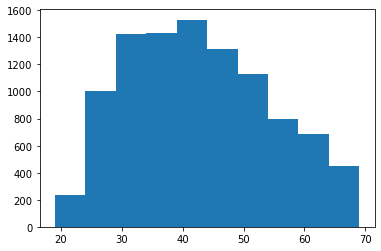

In [12]:
#let's check the distribution of age, maybe it's interesting
plt.hist(raw['Age'])

A jeste histogram vsech numerickych sloupcu pro predstavu

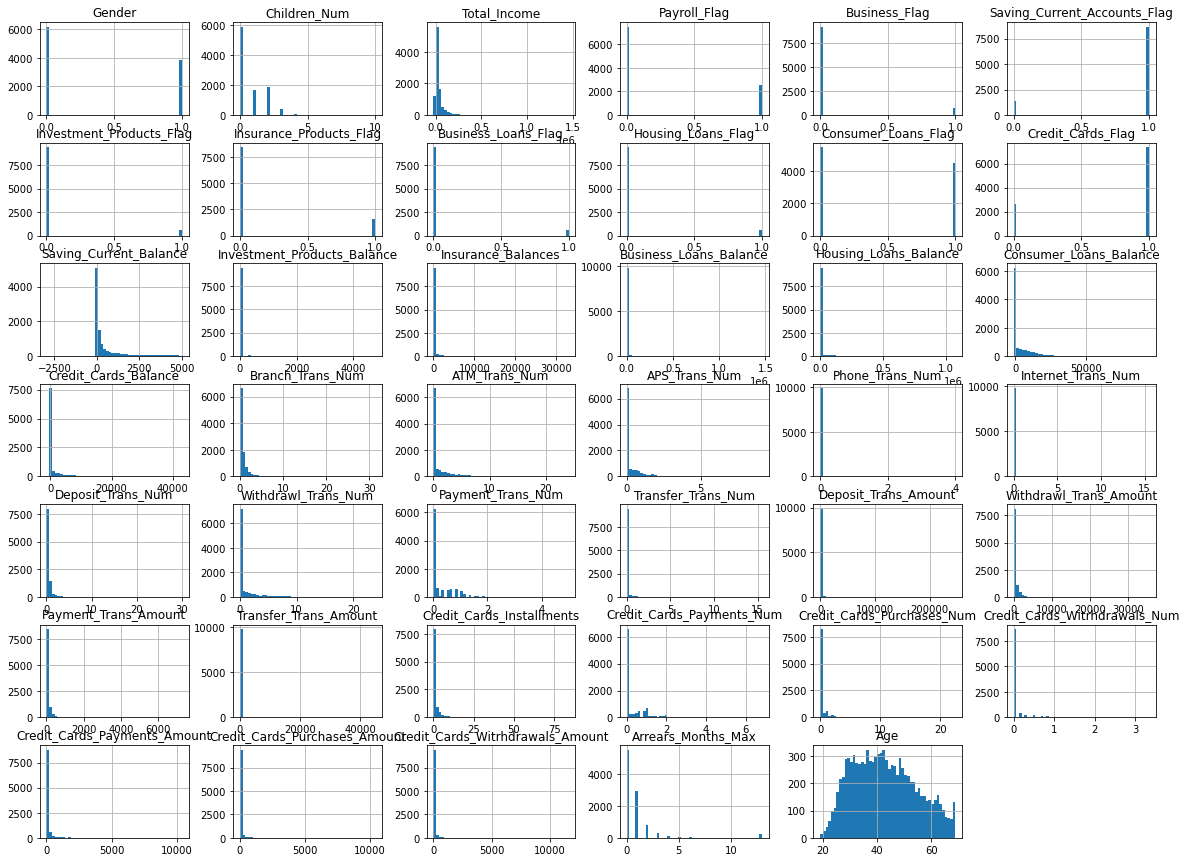

In [13]:
raw.hist(bins = 50, figsize = (20,15))
plt.show()

In [14]:
#pretty fine, looks approximately normally distributed so there's no hard bias with this variable
#getting rid of date variables, don't need them anymore
raw.drop(['Ref_Date','Birth_Date'], axis = 1, inplace=True)

One-hot-encoding promenne Marital_Status

In [15]:
# the marital status should be one-hot-encoded, as there's no direct relationship between categories if we used
# single column encoding
raw['Marital_Status'].value_counts()

Married     6089
Single      2956
Divorced     739
Widow        216
Name: Marital_Status, dtype: int64

In [16]:
checkpoint = raw.copy() #you never know
categories = ['Married','Single','Divorced','Widow']
#can use pandas get_dummies or sklearn.preprocessing OneHotEncoder, however get_dummies is better if we want to 
#get rid of multicollinearity later

dummies = pd.get_dummies(raw['Marital_Status'], columns = categories)



In [17]:
raw = pd.concat([raw, dummies], axis = 1)

In [18]:
raw.drop('Marital_Status', axis = 1, inplace = True)

Uprava promenne Occupation_category, ktera by sla promenit na numericke hodnoty, nelze ale jednoznacne uvazovat vycislitelny hierarchicky vztah mezi kategoriemi, a tak je i tato promenna premenena pomoci One-hot-encodingu

In [19]:
#the last object feature is occupation category, let's see the values
raw['Occupation_Category'].value_counts()

Employees          5609
Business-Owners    1775
Retirees           1108
Rentiers            642
Unemployeed         506
Self-Employees      360
Name: Occupation_Category, dtype: int64

In [20]:
#this is a tricky feature. We can't assume linear relationship between categories, since we also have unemployed and
#retired people in our dataset. We can either one-hot-encode them all, or divide into categories like employed, unemployed, 
#retired, but for the sake of the exercise we will just one-hot-encode them all.
checkpoint = raw.copy()

cats = ['Regular employee','Business Owner','Retired','Rentier','Unemployed','Self-employed']
dummies2 = pd.get_dummies(raw['Occupation_Category'], columns = cats)
dummies2.head()

,Business-Owners,Employees,Rentiers,Retirees,Self-Employees,Unemployeed
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [21]:
raw = pd.concat([raw, dummies2], axis = 1)
raw.drop('Occupation_Category', axis = 1, inplace = True)

In [22]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            10000 non-null  int64  
 1   Children_Num                      10000 non-null  float64
 2   Total_Income                      10000 non-null  float64
 3   Payroll_Flag                      10000 non-null  float64
 4   Business_Flag                     10000 non-null  float64
 5   Saving_Current_Accounts_Flag      10000 non-null  float64
 6   Investment_Products_Flag          10000 non-null  float64
 7   Insurance_Products_Flag           10000 non-null  float64
 8   Business_Loans_Flag               10000 non-null  float64
 9   Housing_Loans_Flag                10000 non-null  float64
 10  Consumer_Loans_Flag               10000 non-null  float64
 11  Credit_Cards_Flag                 10000 non-null  float64
 12  Savin

Preorganizovani tabulky

In [23]:
#let's order the dataset with y being the last feature
raw.columns

Index(['Gender', 'Children_Num', 'Total_Income', 'Payroll_Flag',
       'Business_Flag', 'Saving_Current_Accounts_Flag',
       'Investment_Products_Flag', 'Insurance_Products_Flag',
       'Business_Loans_Flag', 'Housing_Loans_Flag', 'Consumer_Loans_Flag',
       'Credit_Cards_Flag', 'Saving_Current_Balance',
       'Investment_Products_Balance', 'Insurance_Balances',
       'Business_Loans_Balance', 'Housing_Loans_Balance',
       'Consumer_Loans_Balance', 'Credit_Cards_Balance', 'Branch_Trans_Num',
       'ATM_Trans_Num', 'APS_Trans_Num', 'Phone_Trans_Num',
       'Internet_Trans_Num', 'Deposit_Trans_Num', 'Withdrawl_Trans_Num',
       'Payment_Trans_Num', 'Transfer_Trans_Num', 'Deposit_Trans_Amount',
       'Withdrawl_Trans_Amount', 'Payment_Trans_Amount',
       'Transfer_Trans_Amount', 'Credit_Cards_Installments',
       'Credit_Cards_Payments_Num', 'Credit_Cards_Purchases_Num',
       'Credit_Cards_Witrhdrawals_Num', 'Credit_Cards_Payments_Amount',
       'Credit_Cards_Purchases

In [24]:
proper_cats = ['Gender', 'Children_Num', 'Total_Income', 'Payroll_Flag',
       'Business_Flag', 'Saving_Current_Accounts_Flag',
       'Investment_Products_Flag', 'Insurance_Products_Flag',
       'Business_Loans_Flag', 'Housing_Loans_Flag', 'Consumer_Loans_Flag',
       'Credit_Cards_Flag', 'Saving_Current_Balance',
       'Investment_Products_Balance', 'Insurance_Balances',
       'Business_Loans_Balance', 'Housing_Loans_Balance',
       'Consumer_Loans_Balance', 'Credit_Cards_Balance', 'Branch_Trans_Num',
       'ATM_Trans_Num', 'APS_Trans_Num', 'Phone_Trans_Num',
       'Internet_Trans_Num', 'Deposit_Trans_Num', 'Withdrawl_Trans_Num',
       'Payment_Trans_Num', 'Transfer_Trans_Num', 'Deposit_Trans_Amount',
       'Withdrawl_Trans_Amount', 'Payment_Trans_Amount',
       'Transfer_Trans_Amount', 'Credit_Cards_Installments',
       'Credit_Cards_Payments_Num', 'Credit_Cards_Purchases_Num',
       'Credit_Cards_Witrhdrawals_Num', 'Credit_Cards_Payments_Amount',
       'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount',
       'Arrears_Months_Max', 'Age', 'Divorced',
       'Married', 'Single', 'Widow', 'Business-Owners', 'Employees',
       'Rentiers', 'Retirees', 'Self-Employees', 'Unemployeed', 'Time_Deposits_Flag',]
raw = raw[proper_cats]

Kontrola hodnot v jednotlivych sloupcich

In [25]:
#are the flags actually 0/1?
raw['Credit_Cards_Flag'].value_counts()

1.0    7355
0.0    2645
Name: Credit_Cards_Flag, dtype: int64

In [26]:
#let's assume the remaining flags are binary as well
(raw['Total_Income'] == 0).sum()

506

Pruzkum multikolinearity - ukazuji Flags a Balance stejnou informaci?

In [27]:
#is zero income right or missing value? Taking into account that the dataset seems to be complete, let's assume 
#this is on purpose and the people really do have zero official income
cols_to_remove = []
#let's think about the columns we do not need, be it because of multicollinearity or other reasons
print(raw['Business-Owners'].sum(), raw['Business_Flag'].sum()) #no relationship
print(raw['Saving_Current_Accounts_Flag'].sum(), (raw['Saving_Current_Balance']!=0).sum()) #ppl have accounts with no money,can be relevant
print(raw['Investment_Products_Flag'].sum(), (raw['Investment_Products_Balance']>0).sum()) #let's investigate further


1775 789.0
8652.0 7917
615.0 610


(0.0, 500.0)

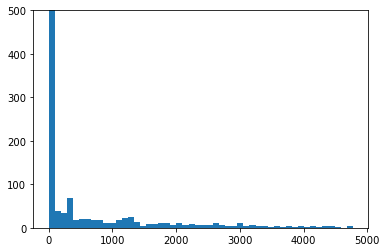

In [28]:
plt.hist((raw['Investment_Products_Balance']), bins = 50)
plt.ylim(top=500)

In [29]:
#yeah let's drop Investment flag
cols_to_remove.append('Investment_Products_Flag')


Srovnavani pozitivnich poctu pribuznych features - Flags vs. Balance a odstranovani flags v pripade podezreni o multikolinearite

In [30]:
print(raw['Insurance_Products_Flag'].sum(), (raw['Insurance_Balances']>0).sum()) #remove

1569.0 1559


In [31]:
cols_to_remove.append('Insurance_Products_Flag')

In [32]:
print(raw['Business_Loans_Flag'].sum(), (raw['Business_Loans_Balance']>0).sum()) #remove

580.0 574


In [33]:
cols_to_remove.append('Business_Loans_Flag')

In [34]:
print(raw['Housing_Loans_Flag'].sum(), (raw['Housing_Loans_Balance']>0).sum()) #remove

591.0 585


In [35]:
cols_to_remove.append('Housing_Loans_Flag')

Consumer Loans je specialni - Balance muze byt 0, avsak flag stale 1 - pujcka je tedy splacena, ale neni uzavrena. Predpokladame, ze rozhoduje castka, a tak Flag odstranime, ackoliv se pocty mirne lisi

In [36]:
print(raw['Consumer_Loans_Flag'].sum(), (raw['Consumer_Loans_Balance']>0).sum()) 

4509.0 4132


c:\users\hartd\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hartd\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0.0, 20000.0)

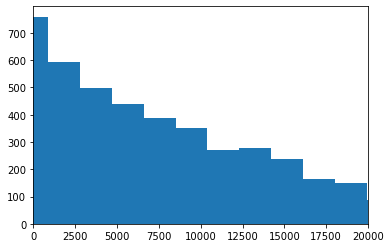

In [37]:
toplot = [raw['Consumer_Loans_Balance'].where(raw['Consumer_Loans_Flag']==1)]
plt.hist(toplot, bins = 50)
plt.xlim(0,20000)

In [38]:
#assuming there are ppl with opened consumer loan who do not owe anything, yet their loan hasn't been closed, we remove
#this flag as well
cols_to_remove.append('Consumer_Loans_Flag')

Opak je pravdou u Credit Cards - fakt, ze je osoba drzitelem kreditni karty (v americkem slova smyslu, i.e. cerpa z ni na dluh), je dulezity, nebot predstavuje urcite riziko. Vyse kreditniho dluhu je taky dulezity fakt a vypovida o necem trochu jinem. Kombinace obou by mohla byt samostatna promenna. Ponechame obe promenne.

In [39]:
print(raw['Credit_Cards_Flag'].sum(), (raw['Credit_Cards_Balance']>0).sum())
#there are people with credit cards with no debt, however, this might be important, guess we keep that one

7355.0 3984


Secteme pocet jednotlivych druhu transakci do jedineho sloupce a puvodnich se kvuli snizeni zbytecne dimenzionality zbavime.

In [40]:
#let's just straight up sum and then remove numbers of transactions
print(raw.columns.get_loc("Branch_Trans_Num"),raw.columns.get_loc("Transfer_Trans_Num"))

19 27


In [41]:
raw['Total_transactions'] = raw.iloc[:,raw.columns.get_loc("Branch_Trans_Num"):raw.columns.get_loc("Transfer_Trans_Num")].sum(axis=1)

In [42]:
raw['Total_transactions'].describe()

count    10000.000000
mean         3.625320
std          4.828016
min          0.000000
25%          0.500000
50%          2.000000
75%          4.666667
max         61.833334
Name: Total_transactions, dtype: float64

(array([8.210e+03, 1.199e+03, 4.060e+02, 1.210e+02, 3.900e+01, 1.000e+01,
        7.000e+00, 6.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0.       ,  6.1833334, 12.3666668, 18.5500002, 24.7333336,
        30.916667 , 37.1000004, 43.2833338, 49.4666672, 55.6500006,
        61.833334 ]),
 <BarContainer object of 10 artists>)

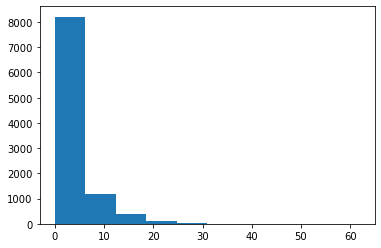

In [43]:
plt.hist(raw['Total_transactions'])

Pocet plateb a nakupu smazeme take, nechame si pouze hodnoty, ktere maji vyssi vypovidajici hodnotu

In [44]:
#lets just remove credit cards cash movements numbers
for i in ['Credit_Cards_Payments_Num','Credit_Cards_Purchases_Num','Credit_Cards_Witrhdrawals_Num']:
    cols_to_remove.append(i)

In [45]:
for i in ['Branch_Trans_Num','ATM_Trans_Num','APS_Trans_Num','Phone_Trans_Num','Internet_Trans_Num','Deposit_Trans_Num',
         'Withdrawl_Trans_Num','Payment_Trans_Num','Transfer_Trans_Num']:
    cols_to_remove.append(i)

In [46]:
len(raw.columns)

53

In [47]:
raw.drop(cols_to_remove, axis = 1, inplace = True)
df = raw.copy()
df.head()

,Gender,Children_Num,Total_Income,Payroll_Flag,Business_Flag,Saving_Current_Accounts_Flag,Credit_Cards_Flag,Saving_Current_Balance,Investment_Products_Balance,Insurance_Balances,...,Single,Widow,Business-Owners,Employees,Rentiers,Retirees,Self-Employees,Unemployeed,Time_Deposits_Flag,Total_transactions
0,0,2.0,14000.0,0.0,0.0,1.0,1.0,27.288333,0.0,0.0,...,0,0,0,0,1,0,0,0,F,1.333332
1,0,0.0,17577.0,0.0,0.0,1.0,0.0,120.186666,0.0,0.0,...,0,0,0,1,0,0,0,0,F,7.333333
2,0,1.0,3000.0,0.0,0.0,1.0,0.0,987.435000,0.0,0.0,...,0,0,0,0,1,0,0,0,F,0.500000
3,0,0.0,14735.0,0.0,0.0,1.0,1.0,5.581666,0.0,0.0,...,0,0,0,0,1,0,0,0,F,0.000000
4,0,0.0,99755.0,0.0,1.0,1.0,1.0,1614.756666,0.0,0.0,...,1,0,1,0,0,0,0,0,F,6.000000


Pruzkum cilove promenne

In [48]:
#and of course, our y
df['Time_Deposits_Flag'].value_counts()

F    9897
T     103
Name: Time_Deposits_Flag, dtype: int64

In [49]:
df['Time_Deposits_Flag'] = df['Time_Deposits_Flag'].map({'F' : 0, 'T' : 1})

In [50]:
df['Time_Deposits_Flag'].value_counts()

0    9897
1     103
Name: Time_Deposits_Flag, dtype: int64

Objevili jsme, ze pozitivnich pripadu mame jen kolem 1% ze vsech zaznamu. 

In [51]:
#we only have 103 yes labels, this is a problem for all the ML algorithms, this is too small
#whatever, let's go on
df.columns

Index(['Gender', 'Children_Num', 'Total_Income', 'Payroll_Flag',
       'Business_Flag', 'Saving_Current_Accounts_Flag', 'Credit_Cards_Flag',
       'Saving_Current_Balance', 'Investment_Products_Balance',
       'Insurance_Balances', 'Business_Loans_Balance', 'Housing_Loans_Balance',
       'Consumer_Loans_Balance', 'Credit_Cards_Balance',
       'Deposit_Trans_Amount', 'Withdrawl_Trans_Amount',
       'Payment_Trans_Amount', 'Transfer_Trans_Amount',
       'Credit_Cards_Installments', 'Credit_Cards_Payments_Amount',
       'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount',
       'Arrears_Months_Max', 'Age', 'Divorced', 'Married', 'Single', 'Widow',
       'Business-Owners', 'Employees', 'Rentiers', 'Retirees',
       'Self-Employees', 'Unemployeed', 'Time_Deposits_Flag',
       'Total_transactions'],
      dtype='object')

In [52]:
colsfinal = ['Gender', 'Children_Num', 'Total_Income', 'Payroll_Flag',
       'Business_Flag', 'Saving_Current_Accounts_Flag', 'Credit_Cards_Flag',
       'Saving_Current_Balance', 'Investment_Products_Balance',
       'Insurance_Balances', 'Business_Loans_Balance', 'Housing_Loans_Balance',
       'Consumer_Loans_Balance', 'Credit_Cards_Balance',
       'Deposit_Trans_Amount', 'Withdrawl_Trans_Amount',
       'Payment_Trans_Amount', 'Transfer_Trans_Amount',
       'Credit_Cards_Installments', 'Credit_Cards_Payments_Amount',
       'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount',
       'Arrears_Months_Max', 'Age', 'Divorced', 'Married', 'Single', 'Widow',
       'Business-Owners', 'Employees', 'Rentiers', 'Retirees',
       'Self-Employees', 'Unemployeed', 'Total_transactions', 'Time_Deposits_Flag']
df = df[colsfinal]

Rozdeleni finalni upravy dat na train, valid a test set. Train je set trenovaci, valid je validacni, na kterem se evaluuji algoritmy, kterym se test poskytne az nakonec (A POUZE JEDNOU!!!). Aby nedoslo k overfitu algoritmu na train datech a zaroven aby 'nebyl seznamen' s finalnim testem.

In [53]:
# we only have 10k instead of 120k data, it's quite possible the sampling was done in a rather unlucky manner, whatevs
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df[df.columns[-1]]
X.head()

,Gender,Children_Num,Total_Income,Payroll_Flag,Business_Flag,Saving_Current_Accounts_Flag,Credit_Cards_Flag,Saving_Current_Balance,Investment_Products_Balance,Insurance_Balances,...,Married,Single,Widow,Business-Owners,Employees,Rentiers,Retirees,Self-Employees,Unemployeed,Total_transactions
0,0,2.0,14000.0,0.0,0.0,1.0,1.0,27.288333,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1.333332
1,0,0.0,17577.0,0.0,0.0,1.0,0.0,120.186666,0.0,0.0,...,0,0,0,0,1,0,0,0,0,7.333333
2,0,1.0,3000.0,0.0,0.0,1.0,0.0,987.435000,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0.500000
3,0,0.0,14735.0,0.0,0.0,1.0,1.0,5.581666,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0.000000
4,0,0.0,99755.0,0.0,1.0,1.0,1.0,1614.756666,0.0,0.0,...,0,1,0,1,0,0,0,0,0,6.000000


In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Time_Deposits_Flag, dtype: int64

In [55]:
print(len(X), len(y))

10000 10000


Samotne deleni datasetu pomoci train_test_split knihovny sklearn

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1000, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 1000, random_state = 42)

In [57]:
print(len(X_train), len(X_valid), len(X_test))

8000 1000 1000


Pruzkum rozlozeni pozitivnich zaznamu v jednotlivych setech. Problemem je, ze je jejich vyskyt pod 1%. Nejprve budeme tento fakt ignorovat a posleze se k uprave vratime.

In [58]:
#out of curiosity, let's check the labels
print((y_train == 1).sum(), (y_valid == 1).sum(), (y_test == 1).sum())

85 6 12


Skalovani dat - na rozhodovaci stromy nema skalovani vliv, ovsem neuronove site provadeji vypocty nad maticemi a tenzory a skaly dat mohou mit na takove vypocty obrovsky vliv. Je zadouci vse vyskalovat, zde pouzit standard scaler, jenz od kazde hodnoty odecte mean sloupce a vydeli smerodatnou odchylkou, takze hodnoty jednotlivych features odpovidaji rozdeleni N(0,1)

In [59]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_valid)
scaler.transform(X_test)

array([[-0.78392013, -0.7181439 ,  0.64719604, ..., -0.19324699,
        -0.23301557,  0.69383573],
       [-0.78392013, -0.7181439 ,  1.0843032 , ..., -0.19324699,
        -0.23301557,  1.15533954],
       [ 1.27564015, -0.7181439 , -0.44223177, ..., -0.19324699,
        -0.23301557, -0.761676  ],
       ...,
       [ 1.27564015, -0.7181439 , -0.18955941, ..., -0.19324699,
        -0.23301557, -0.37117269],
       [-0.78392013, -0.7181439 , -0.43848232, ..., -0.19324699,
        -0.23301557, -0.33567255],
       [-0.78392013, -0.7181439 , -0.33704555, ...,  5.1747249 ,
        -0.23301557, -0.761676  ]])

Prvni vyuzitou metodou bude Ensemble learning - nejprve vytrenujeme jednotlive zvolene algoritmy (Random Forest, Extra Trees, Support vector Classifier a Multi-layer perceptron classifier knihovny Scikit-learn) a ohodnotime jejich vykonnost, nasledne je vlozime jako komponenty do Voting Classifieru, kde bude mit kazdy estimator hlas na celkovem vysledku volby kategorie. Voting muze byt HARD (bud 0 nebo 1) nebo SOFT (vraci pravdepodobnosti ke kazde mozne tride)

In [60]:
#basic voting classifier 

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [61]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(random_state=42)


c:\users\hartd\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training the MLPClassifier(random_state=42)


Skore jednotlivych samostatnych klasifikatoru

SVC neni vhodny, po shlednuti vykonnosti ho nebudeme dale uvazovat

In [62]:
[estimator.score(X_valid, y_valid) for estimator in estimators]

[0.994, 0.993, 0.911, 0.994]

Konstrukce Voting Classifieru

In [63]:
#that's very nice, but even a predictor returning only 0 has over 98% accuracy at this point)
#also, LinearSVC is not appropriate
from sklearn.ensemble import VotingClassifier


named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("mlp_clf", mlp_clf),
]

voting_clf = VotingClassifier(named_estimators)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

Performance Voting Classifieru na validacnim datasetu

In [64]:
voting_clf.score(X_valid, y_valid)

0.994

In [65]:
#score for every estimator used
[estimator.score(X_valid, y_valid) for estimator in voting_clf.estimators_]

[0.994, 0.993, 0.994]

A nakonec presnost na testovem datasetu. Presnost je 0.988, coz vypada skvele, jenze pozitivnich hodnot je jen cca 1%. Pokud bychom napsali jednoduchou funkci, ktera bude vse klasifikovat jako 0, bude mit vyssi presnost. Nemame vhodna data.

In [66]:
#let's measure test set accuracy
from sklearn.metrics import accuracy_score

y_predd = voting_clf.predict(X_test)
accuracy_score(y_test, y_predd)

0.988

Dale je pouzit stacking (nebo take blending) - output jednoho algoritmu je inputem druheho, a tak algoritmy opravuji postupne jeden druhy. 

In [67]:
#building a blender (stacking)
estimators = [random_forest_clf, extra_trees_clf, mlp_clf]
X_valid_predictions = np.empty((len(X_valid), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_valid_predictions[:, index] = estimator.predict(X_valid)

In [68]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_valid_predictions, y_valid)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

Score je 0.994, coz neni zle.

In [69]:
rnd_forest_blender.oob_score_

0.994

In [70]:
#accuracy seems to be the same

### Neuronova sit pomoci TensorFlow

In [71]:
# TF NN #
#very basic TF NN
import tensorflow as tf

len(X_train.columns)

35

Zde nejprve pouzijeme obecny model. V nem uvazujeme tri vrstvy (vstupni s takovym poctem neuronu, kolik je variables v X setu), prostredni s hyperparametrem pro velikost vrstvy (zde 50 = 50 neuronu), a nakonec vrstvu vracejici 2 vystupy pomoci aktivacni funkce softmax - pravdepodobnosti pro jednotlive tridy. Aktivacni funkci pro prvni dve vrstvy je nejpouzivanejsi Rectified Linear Unit (relu), jako optimalizacni algoritmus je vybran defaultni Adam, ztrata vypoctena pomoci Sparse Categorical Crossentropy. Metrikou bude presnost. 

Pozn. Tento model je vhodny spise pro klasifikaci vicero trid, na logistickou regresi mame vhodnejsi model dale

In [72]:
input_size = len(X_train.columns)
output_size = 2 #0/1
hidden_layer_size = 50 #neurons in one layer

model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'softmax') #binary outputs --> softmax ftw, transforms outputs into Ps
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Velikost batche, pocet epochs (opakovani uceni) jsou hyperparametry, stejne jako patience (trpelivost) pro vestavenou pojistku proti overfittingu - Early Stopping. Tato funkce zastavi uceni v pripade, ze se ztrata na validacnich datech k-krat po sobe zvysila.

Nasledujici kus kodu trenuje model na train datech. Argument verbose vypisuje stav uceni. V ramci tohoto modelu je early stopping zakomentovany, nyni ho nevyuzijeme.

In [73]:
BATCH_SIZE = 250
MAX_EPOCHS = 20
patience = 30 
early_stopping = tf.keras.callbacks.EarlyStopping(patience = patience) #stops after X consecutive val_loss increases
#comment early_stopping and delete callbacks argument to remove this limitation

history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = MAX_EPOCHS, callbacks = [early_stopping],
          validation_data = (X_valid, y_valid), verbose = 2)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

32/32 - 0s - loss: 106.2829 - accuracy: 0.9477 - val_loss: 15.7931 - val_accuracy: 0.9840
Epoch 2/20
32/32 - 0s - loss: 29.0866 - accuracy: 0.9506 - val_loss: 7.1232 - val_accuracy: 0.9450
Epoch 3/20
32/32 - 0s - loss: 16.6947 - accuracy: 0.9719 - val_loss: 8.7292 - val_accuracy: 0.9910
Epoch 4/20
32/32 - 0s - loss: 22.7106 - accuracy: 0.9632 - val_loss: 19.2096 - val_accuracy: 0.9940
Epoch 5/20
32/32 - 0s - loss: 49.7147 - accuracy: 0.9875 - val_loss: 5.6547 - val_accuracy: 0.9940
Epoch 6/20

Je dobre po kazdem uceni zobrazit si vyvoj ztraty na train a valid datech pro podporu odhadu toho, kolik epochs modelu staci k nauceni a kdy uz je to overfitting.

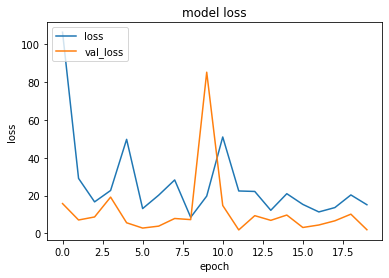

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')

A konecne predikce na test set. Opet neco malo pod 99, coz vzhledem k datum neni uspech. 

In [75]:
#prediction on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 4.2847 - accuracy: 0.9850


In [76]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss,test_accuracy*100.))


Test loss: 4.28. Test accuracy: 98.50%


Tato metoda nebyla prilis vhodna, musime nejakym zpusobem resit maly pocet targetu s hodnotou 1.

## Reseni maleho poctu pozitivnich targets pomoci metodiky SMOTE

Smote - synthetic minority oversampling. Pomoci modulu imblearn muzeme vytvorit synteticke zaznamy zalozene na skutecnych puvodnich pozitivnich targets. Nastavime tedy oversampling na target promennou 1 a undersampling na promennou 0. Vybere se vice pozitivnich a mene negativnich z puvodniho datasetu

In [77]:
### LOGISTIC REGRESSION WITH SMOTE AND/OR BOOSTING ###

import imblearn
from sklearn.linear_model import LogisticRegression
from collections import Counter

Tvorba pipeline na resample a resample dat

In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns

over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 0.5)
seq = [('o', over),('u', under)]

pipeline = Pipeline(steps = seq)

Xn, yn = pipeline.fit_resample(X,y)

Graficke zobrazeni jednotlivych zaznamu pomoci analyzy hlavnich komponent - PCA. PCA je metoda pouzivana pro snizeni dimenzionality datasetu. Zde 35 promennych redukujeme na 2 pro ucely scatterplotu cilovych hodnot. To provadi nasledujici kod. Vypovidajici hodnota jednotlivych komponent je merena pomoci procent rozptylu, ktere jednotlive dimenze vysvetluji. Skvela hodnota je 0.95, dobra nad 0.8, pod 0.6 neni prilis dobra. Vyuziva se pri clusteringu nebo je jednou z metod snizeni dimenzionality pro urychleni trenovaciho procesu. 

Graf noveho datasetu

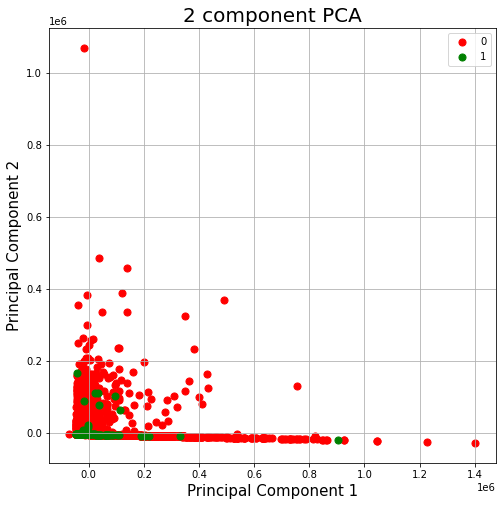

In [79]:
#let's have a looksie using PCA on the original distribution of the targets and the final one
from sklearn.decomposition import PCA #reduces dimensionality of the model, this time for the purpose of plotting
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
pcadf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
initialdist = pd.concat([pcadf, y], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = initialdist['Time_Deposits_Flag'] == target
    ax.scatter(initialdist.loc[indicesToKeep, 'principal component 1']
               , initialdist.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Graf stareho datasetu, je videt rozdil v cetnosti

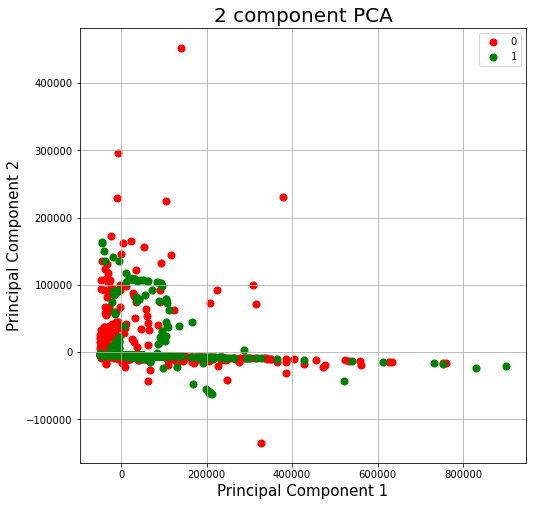

In [80]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xn.values)
pcadf2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
newdist = pd.concat([pcadf2, yn], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = newdist['Time_Deposits_Flag'] == target
    ax.scatter(newdist.loc[indicesToKeep, 'principal component 1']
               , newdist.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [81]:
#okay, that seems more balanced than before, let's try performing some ML on that
#this time I won't use validation subset

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size = 1000, random_state = 42)

Evaluace ensemble learning algoritmu na novych datech pomoci Cross Validation a opakovaneho stratifikovaneho KFoldu. Metrikou je tentokrat, jak je u logisticke regrese s binarnim vystupem spravne a zadouci, AUC score (area under the curve). AUC nad 0.8 je povazovano za dobre, nad 0.9 skvele.

POZOR: Pro vyuziti skore roc_auc je treba mit Voting Classifier prepnuty na soft voting, v definici algoritmu 'voting='soft''

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#we'll try voting_clf first
### TAKES SOME TIME ###
voting_clf_soft = VotingClassifier(named_estimators, voting = 'soft')
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
scores = cross_val_score(voting_clf_soft, Xn_train, yn_train, scoring = 'roc_auc', cv = cv)
print('Mean ROC AUC: %.3f' % np.mean(scores)) 

Mean ROC AUC: 0.979


Dale opet neuronova sit v TensorFlow na novych datech. Tentokrat ovsem posledni vrstva vraci pouze jednu hodnotu a aktivacni funkci je sigmoid, coz je spravna aktivacni funkce, pokud provadime binarni klasifikaci. V nasledujici bunce konstrukce modelu. Optimizacnim algoritmem je opet Adam, ale uz u nej upravujeme jeden z nejdulezitejsich hyperparametru - learning rate (v ramci Gradient Descent je LR velikost kroku, ktery algoritmus udela pri kazde backpropagaci - pokud je moc velky, algoritmus osciluje na krivce a nenalezne minimum. Napr pri hodnote 0.5. Pokud je maly, trva dlouho, nez konverguje. Defaultne je tato hodnota nastavena na 0.001, experimentujeme i s jinymi hodnotami.

Tentokrate je ztrata merena pomoci binarni krizove entropie, coz je pri binarni klasifikaci daleko vhodnejsi varianta. Metrikou je opet AUC

In [83]:
### TF NN AGAIN ###
input_size = len(Xn_train.columns)
output_size = 1 #sigmoid = 1, softmax = 2
hidden_layer_size = 50 #neurons in one layer

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'sigmoid') #binary outputs --> softmax transforms outputs into Ps, sigmoid 0/1
])
lr = 0.005
adam = tf.keras.optimizers.Adam(learning_rate=lr)
model2.compile(optimizer = adam, loss = 'BinaryCrossentropy', metrics = ['AUC'])

zaznam o uceni ukladame do promenne history (nejaky zazity standard) pro ucely zobrazeni krivek loss a metrik

In [84]:
BATCH_SIZE = 500
MAX_EPOCHS = 500

#patience = 30
#early_stopping = tf.keras.callbacks.EarlyStopping(patience = patience) #stops after X consecutive val_loss increases
#comment early_stopping and delete callbacks argument to remove this limitation

history2 = model2.fit(Xn_train, yn_train, batch_size = BATCH_SIZE, epochs = MAX_EPOCHS, 
                      validation_data = (Xn_test, yn_test), verbose = 2)  #callbacks = [early_stopping],

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4/4 - 1s - loss: 1516.2026 - auc: 0.4821 - val_loss: 869.3538 - val_auc: 0.4998
Epoch 2/500
4/4 - 0s - loss: 771.7498 - auc: 0.5506 - val_loss: 791.3215 - val_auc: 0.6040
Epoch 3/500
4/4 - 0s - loss: 634.0993 - auc: 0.5660 - val_loss: 683.5895 - val_auc: 0.4997
Epoch 4/500
4/4 - 0s - loss: 398.6212 - auc: 0.5931 - val_loss: 271.4189 - val_auc: 0.6294
Epoch 5/500
4/4 - 0s - loss: 215.7702 - auc: 0.5614 - val_loss: 292.1212 - val_auc: 0.6324
Epoch 6/500
4/4 - 0s - loss: 269.7621 - auc: 0.6363 

Epoch 84/500
4/4 - 0s - loss: 26.7213 - auc: 0.6973 - val_loss: 39.4917 - val_auc: 0.6427
Epoch 85/500
4/4 - 0s - loss: 30.3039 - auc: 0.6901 - val_loss: 67.8814 - val_auc: 0.5701
Epoch 86/500
4/4 - 0s - loss: 37.7165 - auc: 0.6679 - val_loss: 49.8461 - val_auc: 0.6062
Epoch 87/500
4/4 - 0s - loss: 49.7055 - auc: 0.6670 - val_loss: 50.2535 - val_auc: 0.6208
Epoch 88/500
4/4 - 0s - loss: 45.9660 - auc: 0.6561 - val_loss: 26.5105 - val_auc: 0.7247
Epoch 89/500
4/4 - 0s - loss: 20.4432 - auc: 0.7090 - val_loss: 31.9486 - val_auc: 0.6699
Epoch 90/500
4/4 - 0s - loss: 16.2923 - auc: 0.7193 - val_loss: 24.6654 - val_auc: 0.6816
Epoch 91/500
4/4 - 0s - loss: 21.9325 - auc: 0.6650 - val_loss: 55.0232 - val_auc: 0.6685
Epoch 92/500
4/4 - 0s - loss: 25.5556 - auc: 0.6952 - val_loss: 20.1555 - val_auc: 0.7044
Epoch 93/500
4/4 - 0s - loss: 18.5526 - auc: 0.7240 - val_loss: 72.7598 - val_auc: 0.5529
Epoch 94/500
4/4 - 0s - loss: 42.4839 - auc: 0.6375 - val_loss: 78.6220 - val_auc: 0.5569
Epoch 95/5

Epoch 174/500
4/4 - 0s - loss: 33.2146 - auc: 0.6609 - val_loss: 33.1161 - val_auc: 0.6976
Epoch 175/500
4/4 - 0s - loss: 24.5797 - auc: 0.7278 - val_loss: 18.6413 - val_auc: 0.7691
Epoch 176/500
4/4 - 0s - loss: 28.3355 - auc: 0.6858 - val_loss: 26.3112 - val_auc: 0.7272
Epoch 177/500
4/4 - 0s - loss: 25.0183 - auc: 0.6767 - val_loss: 22.3496 - val_auc: 0.7788
Epoch 178/500
4/4 - 0s - loss: 28.0600 - auc: 0.6838 - val_loss: 28.4796 - val_auc: 0.7405
Epoch 179/500
4/4 - 0s - loss: 29.9438 - auc: 0.6659 - val_loss: 80.2939 - val_auc: 0.6684
Epoch 180/500
4/4 - 0s - loss: 54.5419 - auc: 0.6464 - val_loss: 27.9491 - val_auc: 0.6538
Epoch 181/500
4/4 - 0s - loss: 56.3067 - auc: 0.7075 - val_loss: 56.0398 - val_auc: 0.5625
Epoch 182/500
4/4 - 0s - loss: 54.1953 - auc: 0.6221 - val_loss: 83.8592 - val_auc: 0.6790
Epoch 183/500
4/4 - 0s - loss: 47.9481 - auc: 0.6675 - val_loss: 23.9628 - val_auc: 0.6922
Epoch 184/500
4/4 - 0s - loss: 33.1159 - auc: 0.7226 - val_loss: 63.2637 - val_auc: 0.5632

4/4 - 0s - loss: 23.4296 - auc: 0.7251 - val_loss: 24.7101 - val_auc: 0.6590
Epoch 265/500
4/4 - 0s - loss: 18.6274 - auc: 0.7049 - val_loss: 40.5911 - val_auc: 0.7209
Epoch 266/500
4/4 - 0s - loss: 15.7277 - auc: 0.7026 - val_loss: 51.5692 - val_auc: 0.7147
Epoch 267/500
4/4 - 0s - loss: 38.8781 - auc: 0.7145 - val_loss: 65.1075 - val_auc: 0.5534
Epoch 268/500
4/4 - 0s - loss: 30.0893 - auc: 0.6793 - val_loss: 30.0642 - val_auc: 0.7432
Epoch 269/500
4/4 - 0s - loss: 18.9383 - auc: 0.6890 - val_loss: 50.8666 - val_auc: 0.6885
Epoch 270/500
4/4 - 0s - loss: 34.7516 - auc: 0.6964 - val_loss: 72.9923 - val_auc: 0.5415
Epoch 271/500
4/4 - 0s - loss: 45.6345 - auc: 0.6632 - val_loss: 39.9026 - val_auc: 0.7119
Epoch 272/500
4/4 - 0s - loss: 24.5654 - auc: 0.6760 - val_loss: 39.3790 - val_auc: 0.7186
Epoch 273/500
4/4 - 0s - loss: 32.4558 - auc: 0.7109 - val_loss: 58.2702 - val_auc: 0.5644
Epoch 274/500
4/4 - 0s - loss: 33.3338 - auc: 0.6821 - val_loss: 18.3095 - val_auc: 0.7812
Epoch 275/500

Epoch 355/500
4/4 - 0s - loss: 5.9261 - auc: 0.8020 - val_loss: 17.4515 - val_auc: 0.7996
Epoch 356/500
4/4 - 0s - loss: 12.8340 - auc: 0.7118 - val_loss: 21.6437 - val_auc: 0.7666
Epoch 357/500
4/4 - 0s - loss: 5.4581 - auc: 0.7907 - val_loss: 27.7766 - val_auc: 0.7414
Epoch 358/500
4/4 - 0s - loss: 19.2654 - auc: 0.6904 - val_loss: 11.0963 - val_auc: 0.8447
Epoch 359/500
4/4 - 0s - loss: 7.6473 - auc: 0.7957 - val_loss: 18.5939 - val_auc: 0.7018
Epoch 360/500
4/4 - 0s - loss: 10.4453 - auc: 0.7361 - val_loss: 29.6808 - val_auc: 0.6069
Epoch 361/500
4/4 - 0s - loss: 14.3536 - auc: 0.7380 - val_loss: 19.0013 - val_auc: 0.6930
Epoch 362/500
4/4 - 0s - loss: 8.3116 - auc: 0.7641 - val_loss: 15.0834 - val_auc: 0.7534
Epoch 363/500
4/4 - 0s - loss: 8.8494 - auc: 0.7877 - val_loss: 27.3957 - val_auc: 0.6101
Epoch 364/500
4/4 - 0s - loss: 19.1835 - auc: 0.6769 - val_loss: 41.5630 - val_auc: 0.7093
Epoch 365/500
4/4 - 0s - loss: 26.4557 - auc: 0.6741 - val_loss: 25.6433 - val_auc: 0.6017
Epoc

Epoch 446/500
4/4 - 0s - loss: 4.5533 - auc: 0.8037 - val_loss: 13.0813 - val_auc: 0.7821
Epoch 447/500
4/4 - 0s - loss: 3.1667 - auc: 0.8204 - val_loss: 15.0052 - val_auc: 0.8051
Epoch 448/500
4/4 - 0s - loss: 5.4137 - auc: 0.7806 - val_loss: 26.9732 - val_auc: 0.7414
Epoch 449/500
4/4 - 0s - loss: 11.6106 - auc: 0.7290 - val_loss: 12.0221 - val_auc: 0.8362
Epoch 450/500
4/4 - 0s - loss: 4.9743 - auc: 0.8197 - val_loss: 12.0270 - val_auc: 0.8410
Epoch 451/500
4/4 - 0s - loss: 4.4977 - auc: 0.8046 - val_loss: 15.5276 - val_auc: 0.8097
Epoch 452/500
4/4 - 0s - loss: 9.6512 - auc: 0.7058 - val_loss: 31.4677 - val_auc: 0.7280
Epoch 453/500
4/4 - 0s - loss: 16.2064 - auc: 0.7619 - val_loss: 36.5221 - val_auc: 0.5717
Epoch 454/500
4/4 - 0s - loss: 19.9756 - auc: 0.6815 - val_loss: 17.6563 - val_auc: 0.7893
Epoch 455/500
4/4 - 0s - loss: 18.6616 - auc: 0.6689 - val_loss: 19.6740 - val_auc: 0.7625
Epoch 456/500
4/4 - 0s - loss: 11.7692 - auc: 0.7694 - val_loss: 25.5439 - val_auc: 0.6503
Epoch

Graf vyvoje loss na train a valid setu

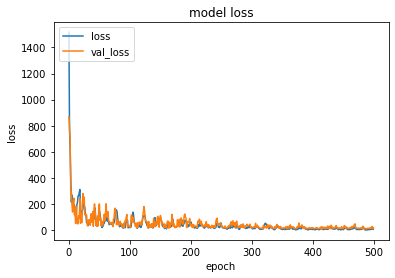

In [85]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')

A nakonec graf vyvoje AUC. Je zadouci, aby byla krivka celkove rostouci.

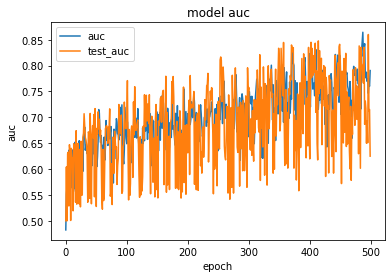

In [86]:
plt.plot(history2.history['auc'])
plt.plot(history2.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['auc', 'test_auc'], loc='upper left')

Nasledujici kod ohodnoti nasi neuronovou sit - vykresli matici omylu pro dane tridy.

In [87]:
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('No Time Deposit Detected (True Negatives): ', cm[0][0])
  print('New Time Deposit Incorrectly Detected (False Positives): ', cm[0][1])
  print('New Time Deposit Missed (False Negatives): ', cm[1][0])
  print('New Time Deposit Detected (True Positives): ', cm[1][1])
  print('Total New Deposits: ', np.sum(cm[1]))

In [88]:
y_pred3 = model2.predict(X_test)

No Time Deposit Detected (True Negatives):  951
New Time Deposit Incorrectly Detected (False Positives):  37
New Time Deposit Missed (False Negatives):  8
New Time Deposit Detected (True Positives):  4
Total New Deposits:  12


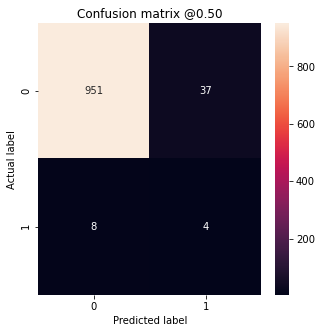

In [89]:
plot_cm(y_test, y_pred3)

## Zaver

Zatimco nas Voting Classifier dokazal v ramci cross-validation dosahnout AUC skore nad 97, neuronova sit predikuje vyrazne mnozstvi falesne pozitivnich. To je pravdepodobne dano tim, ze se lide pro otevreni noveho terminovaneho vkladu rozhoduji na zaklade jeste jinych skutecnosti, nez dat, na kterych jsme vytrenovali nas model a RFC modeluje proces rozhodovani lepe.

Na zaver provedeme jeste jednoduchy RFC

In [93]:
voting_clf_soft.fit(Xn_train, yn_train)

ypredv = voting_clf_soft.predict(X_test)

No Time Deposit Detected (True Negatives):  947
New Time Deposit Incorrectly Detected (False Positives):  41
New Time Deposit Missed (False Negatives):  1
New Time Deposit Detected (True Positives):  11
Total New Deposits:  12


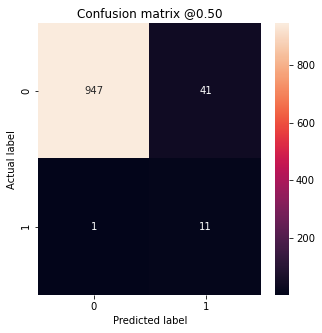

In [94]:
plot_cm(y_test, ypredv)

O dost lepsi conf matrix pro voting soft classifier. Pojdme jeste zkusit GridSearchCV na jednoduchem RFC

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
les2 = RandomForestClassifier(random_state = 42) #we need a new one, which hasn't seen the training data yet
grid_search = GridSearchCV(les2, param_grid, cv=5,
                           scoring='roc_auc',
                           return_train_score=True)
grid_search.fit(Xn_train, yn_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='roc_auc')

In [99]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014470,0.003208,0.006665,0.003375,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",0.944040,0.916074,...,0.931389,0.013736,18,0.995956,0.995467,0.993577,0.993743,0.995163,0.994781,9.512373e-04
1,0.046973,0.002407,0.007620,0.002963,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.980960,0.966360,...,0.970085,0.007445,11,0.999995,0.999962,0.999920,0.999981,0.999988,0.999969,2.710875e-05
2,0.119058,0.004657,0.011711,0.002736,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",0.987897,0.983194,...,0.981871,0.005552,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,0.021022,0.002891,0.000468,0.000937,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",0.944533,0.957725,...,0.939476,0.011151,17,0.997325,0.993786,0.998039,0.997036,0.996840,0.996605,1.467033e-03
4,0.050340,0.004093,0.006574,0.001773,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",0.977244,0.981061,...,0.972142,0.007802,10,1.000000,0.999970,0.999985,0.999980,0.999979,0.999983,9.861915e-06
5,0.138517,0.007333,0.013337,0.003813,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",0.983543,0.986503,...,0.981493,0.005439,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,0.021066,0.004066,0.008014,0.000029,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",0.957232,0.945273,...,0.946384,0.008960,14,0.997234,0.996314,0.997363,0.998514,0.996958,0.997277,7.164972e-04
7,0.054914,0.003000,0.007358,0.002790,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",0.978971,0.970307,...,0.973563,0.003966,9,0.999991,0.999958,0.999989,0.999995,0.999979,0.999982,1.316525e-05
8,0.184222,0.023868,0.016315,0.004625,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",0.985473,0.986619,...,0.984579,0.001813,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,0.029848,0.008525,0.012339,0.016227,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",0.944867,0.952805,...,0.943992,0.006282,16,0.997848,0.997116,0.997855,0.997561,0.994680,0.997012,1.196860e-03


In [100]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9313890871850592 {'max_features': 2, 'n_estimators': 3}
0.9700854324951251 {'max_features': 2, 'n_estimators': 10}
0.9818707277851132 {'max_features': 2, 'n_estimators': 30}
0.9394755766828065 {'max_features': 4, 'n_estimators': 3}
0.9721423494053759 {'max_features': 4, 'n_estimators': 10}
0.9814929172660504 {'max_features': 4, 'n_estimators': 30}
0.9463839084380554 {'max_features': 6, 'n_estimators': 3}
0.9735627434203258 {'max_features': 6, 'n_estimators': 10}
0.9845791568211446 {'max_features': 6, 'n_estimators': 30}
0.9439922278998413 {'max_features': 8, 'n_estimators': 3}
0.9755512631358585 {'max_features': 8, 'n_estimators': 10}
0.9827087600204379 {'max_features': 8, 'n_estimators': 30}
0.9493589174621526 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.974079263163946 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.9535198427622955 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.976683414557168 {'bootstrap': False, 'max_features': 3, 'n_e

Nakonec nejlepsi skore v ramci GridSearchCV ma Random Forest Classifier s argumenty max_features = 8 a n_estimators = 30. Pojdme ho fitnout.

In [106]:
les2 = RandomForestClassifier(random_state = 42, max_features = 8, n_estimators = 30)
les2.fit(Xn_train, yn_train)
ypred_final = les2.predict(Xn_test)

from sklearn.metrics import roc_auc_score as ras

ras(yn_test, ypred_final)

0.9292347963281699

No Time Deposit Detected (True Negatives):  655
New Time Deposit Incorrectly Detected (False Positives):  9
New Time Deposit Missed (False Negatives):  43
New Time Deposit Detected (True Positives):  293
Total New Deposits:  336


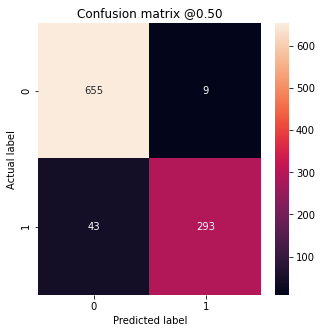

In [107]:
plot_cm(yn_test, ypred_final)

To je hezka matice!

Feature ranking:
1. feature 6 (0.161510) Credit_Cards_Flag
2. feature 7 (0.088807) Saving_Current_Balance
3. feature 2 (0.077569) Total_Income
4. feature 23 (0.075411) Age
5. feature 29 (0.057195) Employees
6. feature 1 (0.056519) Children_Num
7. feature 17 (0.040101) Transfer_Trans_Amount
8. feature 25 (0.035946) Married
9. feature 34 (0.035783) Total_transactions
10. feature 22 (0.035036) Arrears_Months_Max
11. feature 15 (0.034273) Withdrawl_Trans_Amount
12. feature 26 (0.030068) Single
13. feature 13 (0.026738) Credit_Cards_Balance
14. feature 3 (0.023711) Payroll_Flag
15. feature 28 (0.023175) Business-Owners
16. feature 8 (0.022751) Investment_Products_Balance
17. feature 12 (0.021288) Consumer_Loans_Balance
18. feature 0 (0.019972) Gender
19. feature 14 (0.019142) Deposit_Trans_Amount
20. feature 20 (0.014310) Credit_Cards_Purchases_Amount
21. feature 16 (0.012080) Payment_Trans_Amount
22. feature 9 (0.011792) Insurance_Balances
23. feature 19 (0.011702) Credit_Cards_Payments_Am

TypeError: only integer scalar arrays can be converted to a scalar index

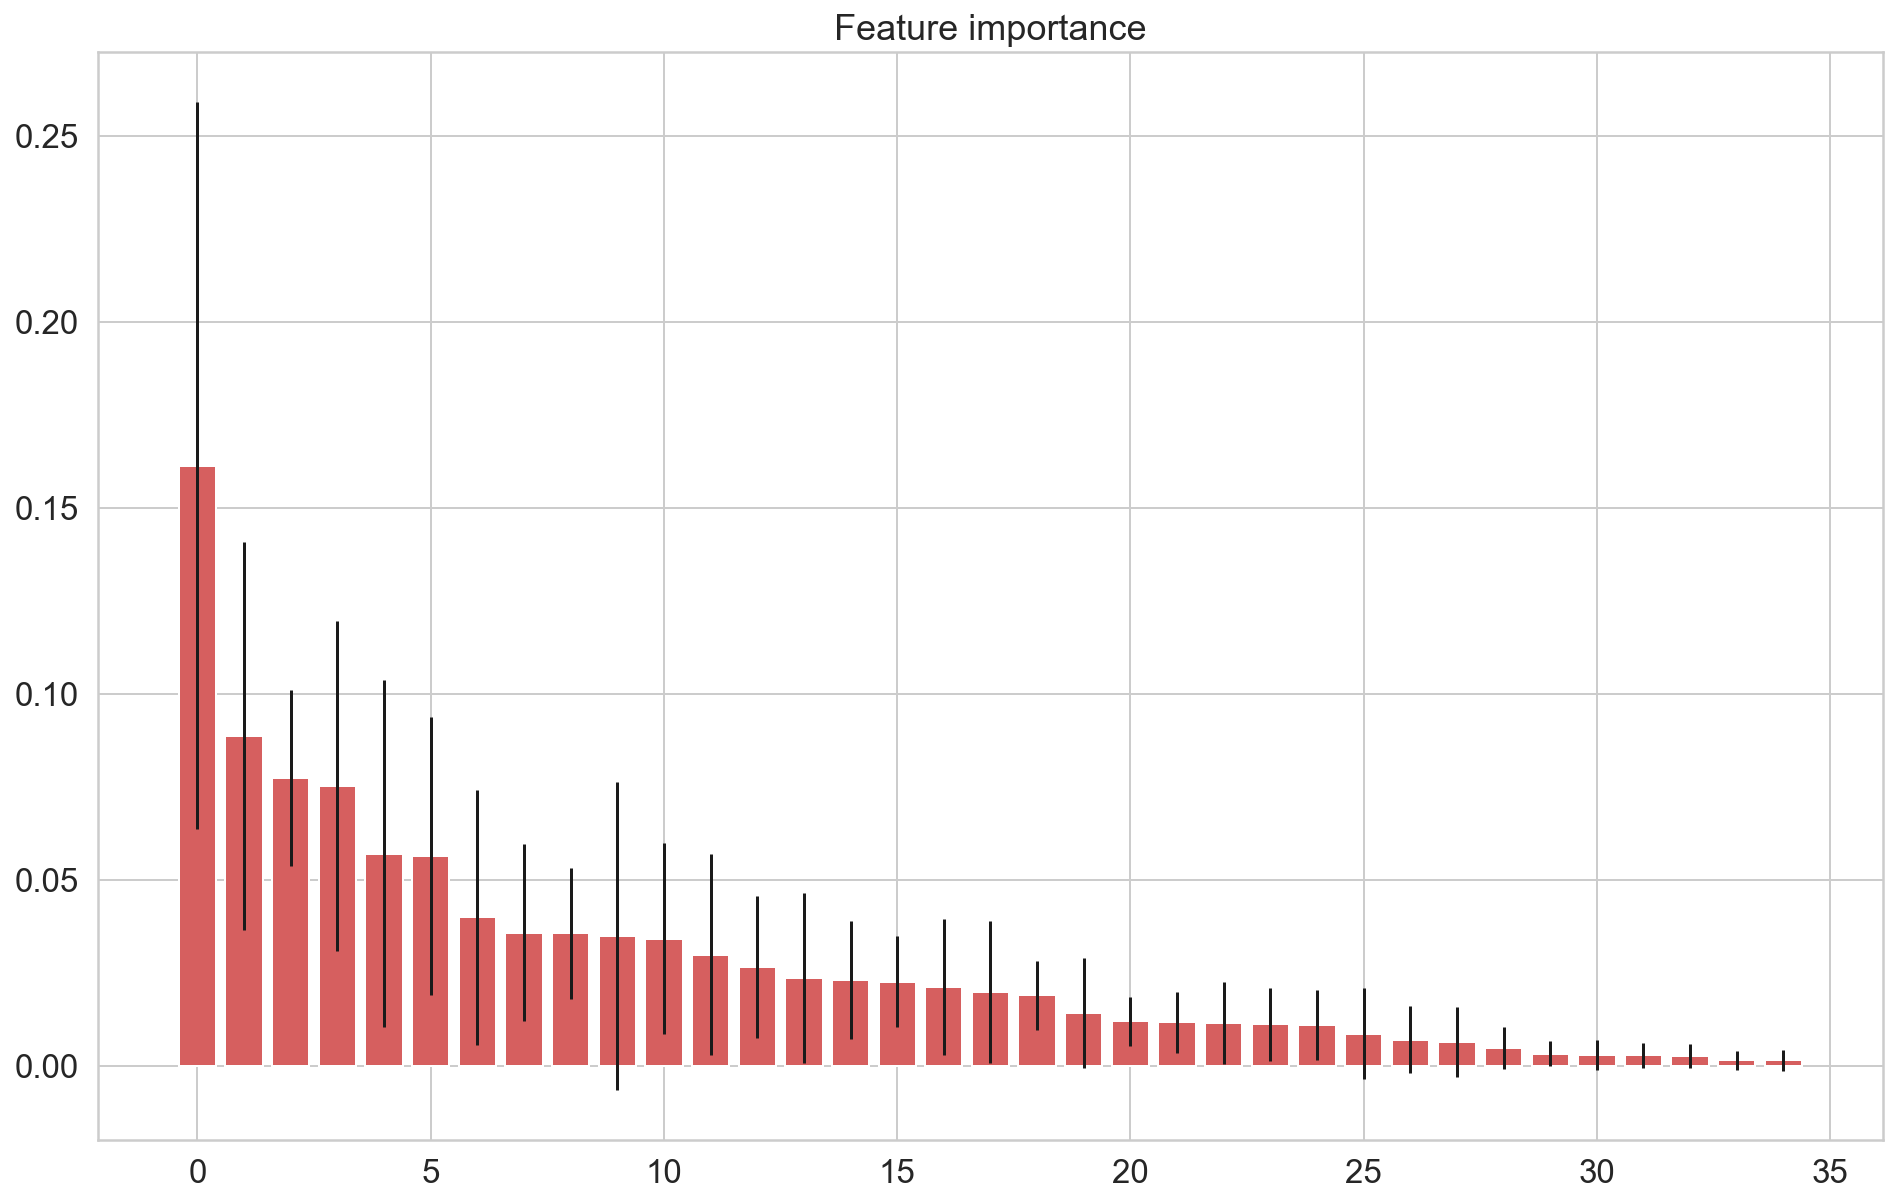

In [124]:
from pylab import rcParams
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

importances = les2.feature_importances_
std = np.std([tree.feature_importances_ for tree in les2.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(len(Xn_train.columns)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), Xn_train.columns[indices[f]])
    
plt.figure()
plt.title("Feature importance")
plt.bar(range(len(Xn_train.columns)), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(Xn_train.columns), indices))
plt.xlim([-1, len(Xn_train.columns)])

In [123]:
Xn_train.columns

Index(['Gender', 'Children_Num', 'Total_Income', 'Payroll_Flag',
       'Business_Flag', 'Saving_Current_Accounts_Flag', 'Credit_Cards_Flag',
       'Saving_Current_Balance', 'Investment_Products_Balance',
       'Insurance_Balances', 'Business_Loans_Balance', 'Housing_Loans_Balance',
       'Consumer_Loans_Balance', 'Credit_Cards_Balance',
       'Deposit_Trans_Amount', 'Withdrawl_Trans_Amount',
       'Payment_Trans_Amount', 'Transfer_Trans_Amount',
       'Credit_Cards_Installments', 'Credit_Cards_Payments_Amount',
       'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount',
       'Arrears_Months_Max', 'Age', 'Divorced', 'Married', 'Single', 'Widow',
       'Business-Owners', 'Employees', 'Rentiers', 'Retirees',
       'Self-Employees', 'Unemployeed', 'Total_transactions'],
      dtype='object')